In [60]:
import pandas as pd
df = pd.read_csv("Dataset_timeseries.csv")


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [62]:
df = df.drop(columns=['Time (s)'])
X = df[['SOPAS']].values  # Features
y = df['Number'].values   # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')  # 4 output classes (0, 1, 2, 3)
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               256       
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dense_32 (Dense)            (None, 8)                 136       
                                                                 
 dense_33 (Dense)            (None, 4)                 36        
                                                                 
Total params: 11292 (44.11 KB)
Trainable params: 11292

In [64]:
# Example: Class weighting
class_weights = {0: 1.0, 1: 4.0, 2: 3.0, 3: 2.0}  # Higher weight for the minority class
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, class_weight=class_weights)


Epoch 1/10
4606/4606 [==============================] - 23s 5ms/step - loss: 2.0924 - accuracy: 0.4899 - val_loss: 1.0479 - val_accuracy: 0.5032
Epoch 2/10
4606/4606 [==============================] - 23s 5ms/step - loss: 2.0760 - accuracy: 0.4991 - val_loss: 1.0374 - val_accuracy: 0.5171
Epoch 3/10
4606/4606 [==============================] - 21s 5ms/step - loss: 2.0736 - accuracy: 0.4974 - val_loss: 1.0752 - val_accuracy: 0.4920
Epoch 4/10
4606/4606 [==============================] - 16s 4ms/step - loss: 2.0721 - accuracy: 0.4974 - val_loss: 1.0606 - val_accuracy: 0.4991
Epoch 5/10
4606/4606 [==============================] - 16s 3ms/step - loss: 2.0714 - accuracy: 0.4998 - val_loss: 1.0278 - val_accuracy: 0.5113
Epoch 6/10
4606/4606 [==============================] - 16s 3ms/step - loss: 2.0705 - accuracy: 0.4976 - val_loss: 1.0551 - val_accuracy: 0.4906
Epoch 7/10
4606/4606 [==============================] - 16s 4ms/step - loss: 2.0696 - accuracy: 0.5002 - val_loss: 1.0714 - val_ac

In [65]:
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

1280/1280 [==============================] - 3s 2ms/step


In [66]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_classes)}")
print(classification_report(y_test, y_pred_classes))

Accuracy: 0.5010870361775411
              precision    recall  f1-score   support

           0       0.82      0.42      0.56     16352
           1       0.28      0.57      0.37      4066
           2       0.27      0.07      0.11      5422
           3       0.48      0.72      0.58     15097

    accuracy                           0.50     40937
   macro avg       0.46      0.45      0.40     40937
weighted avg       0.57      0.50      0.49     40937



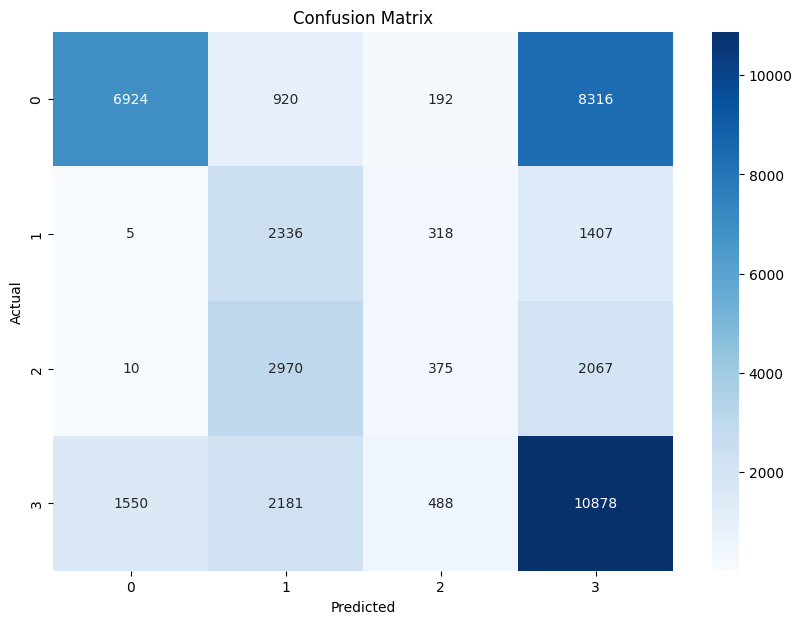

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()